 ## Set up

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

import config
from config import LEVELS, sm, with_sm, no_sm, with_unique_sm, GRAPHS_PATH, genes, proteins, proteoforms
from interactomes import get_interactome, print_interactome_details, get_json_filename, read_graph, get_nums
from lib.graph_database import get_participants, get_components

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [3]:
# Genes:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

# Proteins:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Proteoforms:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Small molecules:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

participant_records = { l: get_participants(l, GRAPHS_PATH) for l in LEVELS}
participant_records[sm] = get_participants(sm, GRAPHS_PATH)

participant_records

{'genes':         Unnamed: 0        Pathway       Reaction         Entity    Name  \
 0                0  R-HSA-1059683  R-HSA-1067640   R-HSA-447100     IL6   
 1                1  R-HSA-1059683  R-HSA-1067640  R-HSA-1067661  IL6R-2   
 2                2  R-HSA-1059683  R-HSA-1067640   R-HSA-447100     IL6   
 3                3  R-HSA-1059683  R-HSA-1067640  R-HSA-1067661  IL6R-2   
 4                4  R-HSA-1059683  R-HSA-1067646   R-HSA-448453   IL6ST   
 ...            ...            ...            ...            ...     ...   
 248393      248393   R-HSA-997272  R-HSA-1013020   R-HSA-164383    GNG5   
 248394      248394   R-HSA-997272  R-HSA-1013020   R-HSA-164367   GNG12   
 248395      248395   R-HSA-997272  R-HSA-1013020   R-HSA-164380    GNG2   
 248396      248396   R-HSA-997272  R-HSA-1013020   R-HSA-420716  GABBR1   
 248397      248397   R-HSA-997272  R-HSA-1013020   R-HSA-420747  GABBR2   
 
                                  Type      Id Database              Role  
 

In [4]:
# Genes:
# Complex, Entity, Name, Type, Id

# Proteins:
# Complex, Entity, Name, Type, Id, PrevId

# Proteoforms:
# Complex, Entity, Name, Type, Id, PrevId

# Small molecules:
# Complex, Entity, Name, Type, Id

components_records = { l: get_components(l, GRAPHS_PATH) for l in LEVELS}
components_records[sm] = get_components(sm, GRAPHS_PATH)

components_records

{'genes':         Unnamed: 0        Complex         Entity          Name  \
 0                0  R-HSA-1006173   R-HSA-976788           CFH   
 1                1  R-HSA-1008206  R-HSA-1008221          NFE2   
 2                2  R-HSA-1008206  R-HSA-1008261          MAFF   
 3                3  R-HSA-1008206  R-HSA-1008212          MAFG   
 4                4  R-HSA-1008206  R-HSA-1008242          MAFK   
 ...            ...            ...            ...           ...   
 108399      108399   R-NUL-997399   R-HSA-879433         S100B   
 108400      108400   R-NUL-997399   R-HSA-976740  APP(672-711)   
 108401      108401   R-NUL-997399   R-HSA-879382         HMGB1   
 108402      108402   R-NUL-997399  R-HSA-2457833  SAA1(19-122)   
 108403      108403   R-NUL-997399   R-HSA-197639          AGER   
 
                                  Type     Id  
 0       EntityWithAccessionedSequence    CFH  
 1       EntityWithAccessionedSequence   NFE2  
 2       EntityWithAccessionedSequence   

In [5]:
participant_records[sm]['unique_sm'] = participant_records[sm].apply(lambda row: row['Id'] + "-" + row['Reaction'], axis=1)
participant_records[sm]

,Unnamed: 0,Pathway,Reaction,Entity,Name,Type,Id,Database,Role,unique_sm
0,0,R-HSA-1059683,R-HSA-1112510,R-ALL-113592,ATP,SimpleEntity,ATP,ChEBI,input,ATP-R-HSA-1112510
1,1,R-HSA-1059683,R-HSA-1112510,R-ALL-29370,ADP,SimpleEntity,ADP,ChEBI,output,ADP-R-HSA-1112510
2,2,R-HSA-1059683,R-HSA-1112514,R-ALL-113592,ATP,SimpleEntity,ATP,ChEBI,input,ATP-R-HSA-1112514
3,3,R-HSA-1059683,R-HSA-1112514,R-ALL-29370,ADP,SimpleEntity,ADP,ChEBI,output,ADP-R-HSA-1112514
4,4,R-HSA-1059683,R-HSA-1112602,R-ALL-113592,ATP,SimpleEntity,ATP,ChEBI,input,ATP-R-HSA-1112602
...,...,...,...,...,...,...,...,...,...,...
31094,31094,R-HSA-997272,R-HSA-1013013,R-ALL-352003,GABA,SimpleEntity,GABA,ChEBI,input,GABA-R-HSA-1013013
31095,31095,R-HSA-997272,R-HSA-1013013,R-ALL-352003,GABA,SimpleEntity,GABA,ChEBI,output,GABA-R-HSA-1013013
31096,31096,R-HSA-997272,R-HSA-1013020,R-ALL-352003,GABA,SimpleEntity,GABA,ChEBI,catalystActivity,GABA-R-HSA-1013020
31097,31097,R-HSA-997272,R-HSA-1013020,R-ALL-29804,K+,SimpleEntity,K+,ChEBI,input,K+-R-HSA-1013020


In [6]:
components_records[sm]['unique_sm'] = components_records[sm].apply(lambda row: row['Id'] + "-" + row['Complex'], axis=1)
components_records[sm]

,Unnamed: 0,Complex,Entity,Name,Type,Id,unique_sm
0,0,R-HSA-1006173,R-ALL-1006168,Sialic acid,SimpleEntity,Sialic acid,Sialic acid-R-HSA-1006173
1,1,R-HSA-1006173,R-ALL-1006140,Heparins,SimpleEntity,Heparins,Heparins-R-HSA-1006173
2,2,R-HSA-1013011,R-ALL-352003,GABA,SimpleEntity,GABA,GABA-R-HSA-1013011
3,3,R-HSA-1013017,R-ALL-352003,GABA,SimpleEntity,GABA,GABA-R-HSA-1013017
4,4,R-HSA-109266,R-ALL-109265,Zn2+,SimpleEntity,Zn2+,Zn2+-R-HSA-109266
...,...,...,...,...,...,...,...
5757,5757,R-NUL-9619245,R-ALL-74016,Ca2+,SimpleEntity,Ca2+,Ca2+-R-NUL-9619245
5758,5758,R-NUL-9619393,R-ALL-74016,Ca2+,SimpleEntity,Ca2+,Ca2+-R-NUL-9619393
5759,5759,R-NUL-997399,R-ALL-879484,Peptide,SimpleEntity,Peptide,Peptide-R-NUL-997399
5760,5760,R-NUL-997399,R-ALL-938699,N-epsilon-(1-(1-carboxy)ethyl)lysine,SimpleEntity,N-epsilon-(1-(1-carboxy)ethyl)lysine,N-epsilon-(1-(1-carboxy)ethyl)lysine-R-NUL-997399


In [7]:
interactomes_no_sm = { l: get_interactome(l, no_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_no_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 453137
Graph nodes: 10968
Graph genes nodes: 10968
Graph small molecule nodes: 0

***********************


Graph for proteins 
Graph edges: 462430
Graph nodes: 11066
Graph proteins nodes: 11066
Graph small molecule nodes: 0

***********************


Graph for proteoforms 
Graph edges: 677057
Graph nodes: 14295
Graph proteoforms nodes: 14295
Graph small molecule nodes: 0

***********************




In [8]:
interactomes_with_sm = { l: get_interactome(l, with_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_with_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 453137
Graph nodes: 12933
Graph genes nodes: 10968
Graph small molecule nodes: 1965

***********************


Graph for proteins 
Graph edges: 462430
Graph nodes: 13031
Graph proteins nodes: 11066
Graph small molecule nodes: 1965

***********************


Graph for proteoforms 
Graph edges: 677057
Graph nodes: 16260
Graph proteoforms nodes: 14295
Graph small molecule nodes: 1965

***********************




In [9]:
interactomes_with_unique_sm = { l: get_interactome(l, with_unique_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}

for level, interactome in interactomes_with_unique_sm.items():
     print_interactome_details(interactome)


Graph for genes 
Graph edges: 453137
Graph nodes: 39078
Graph genes nodes: 10968
Graph small molecule nodes: 28110

***********************


Graph for proteins 
Graph edges: 462430
Graph nodes: 39176
Graph proteins nodes: 11066
Graph small molecule nodes: 28110

***********************


Graph for proteoforms 
Graph edges: 677057
Graph nodes: 42405
Graph proteoforms nodes: 14295
Graph small molecule nodes: 28110

***********************




In [10]:
nums_no_sm = get_nums(interactomes_no_sm)
nums_with_sm = get_nums(interactomes_with_sm)
nums_with_unique_sm = get_nums(interactomes_with_unique_sm)

arrays = [
    [*(["Not Included"]*3), *(["Included"]*3), *(["Reaction-Unique Included"]*3)],
    [*(LEVELS*3)]
]
tuples = list(zip(*arrays))
tuples

[('Not Included', 'genes'),
 ('Not Included', 'proteins'),
 ('Not Included', 'proteoforms'),
 ('Included', 'genes'),
 ('Included', 'proteins'),
 ('Included', 'proteoforms'),
 ('Reaction-Unique Included', 'genes'),
 ('Reaction-Unique Included', 'proteins'),
 ('Reaction-Unique Included', 'proteoforms')]

In [11]:
index = pd.MultiIndex.from_tuples(tuples, names=["Small Molecules", "Entity Level"])
index

MultiIndex([(            'Not Included',       'genes'),
            (            'Not Included',    'proteins'),
            (            'Not Included', 'proteoforms'),
            (                'Included',       'genes'),
            (                'Included',    'proteins'),
            (                'Included', 'proteoforms'),
            ('Reaction-Unique Included',       'genes'),
            ('Reaction-Unique Included',    'proteins'),
            ('Reaction-Unique Included', 'proteoforms')],
           names=['Small Molecules', 'Entity Level'])

In [12]:
num_interactions = [*nums_no_sm[0], *nums_with_sm[0], *nums_with_unique_sm[0]]
num_entities = [*nums_no_sm[1], *nums_with_sm[1], *nums_with_unique_sm[1]]
num_small_molecules = [*nums_no_sm[2], *nums_with_sm[2], *nums_with_unique_sm[2]]

print(num_interactions)
print(num_entities)
print(num_small_molecules)

[453137, 462430, 677057, 453137, 462430, 677057, 453137, 462430, 677057]
[10968, 11066, 14295, 10968, 11066, 14295, 10968, 11066, 14295]
[0, 0, 0, 1965, 1965, 1965, 28110, 28110, 28110]


In [13]:
sizes = pd.DataFrame({
    "Interactions": num_interactions,
    "Accessioned Entities": num_entities,
    "Small Molecules": num_small_molecules
}, index=index)
sizes.columns.name = ""
sizes

Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Included                 genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Reaction-Unique Included genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   

                                       Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    1965  
                         proteins                 1965  
                         proteoforms              1965  
Reaction-Unique Included genes                   28110  
                         proteins                28110  
                         proteoforms             28110

In [19]:
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]


In [29]:
degree_sequences = pd.Series([sorted([d for n, d in interactome.degree()], reverse=True) for interactome in interactomes], index=index)
degree_sequences

Small Molecules           Entity Level
Not Included              genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Included                  genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Reaction-Unique Included  genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
dtype: object

In [30]:
mins = pd.Series([min(degree_sequence) for degree_sequence in degree_sequences], index=index)
maxs = pd.Series([max(degree_sequence) for degree_sequence in degree_sequences], index=index)
avgs = pd.Series([sum(degree_sequence)/len(degree_sequence) for degree_sequence in degree_sequences], index=index)

degrees_mma = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
degrees_mma.columns.name = ""
degrees_mma

Min   Max   Avg
Small Molecules          Entity Level                 
Not Included             genes           0  1241 82.63
                         proteins        0  1242 83.58
                         proteoforms     0  1469 94.73
Included                 genes           0  1241 70.07
                         proteins        0  1242 70.97
                         proteoforms     0  1469 83.28
Reaction-Unique Included genes           0  1241 23.19
                         proteins        0  1242 23.61
                         proteoforms     0  1469 31.93

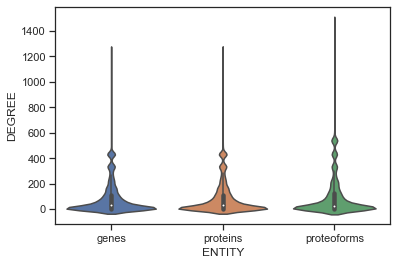

In [16]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

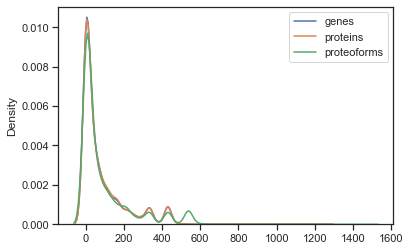

In [17]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

In [18]:
degrees = {l: [graphs[l].degree(n) for n, t in graphs[l].nodes(data='type') if t != "SimpleEntity"] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_df = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_df.columns.name = "Entity Type"
degrees_df

NameError: name 'graphs' is not defined

In [ ]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

In [ ]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

## Bridges and Articulation points

In [ ]:
br_ap = pd.DataFrame({
    "Articulation Points": [len(list(nx.articulation_points(graphs[l]))) for l in LEVELS],
    "Bridges": [len(list(nx.bridges(graphs[l]))) for l in LEVELS]},
    index=LEVELS)
br_ap.columns.name = "Entity Type"

br_ap

In [ ]:
#plot_low_level_pathways(figures_path="figures/pathways/", graphs_path="reports/pathways/")

In [ ]:
# TODO: Write function that plots and highlights the articulation points of an interaction network.
# TODO: Write function that plots and highlights also the bridges of the network.